In [43]:
#data is the directory where the .csv file is located
#from __future__ import print_function
import os
from pathlib import Path
#data_path = Path('D:/research')
#print (data_path)
#filepath = data_path/"KDD_Train.csv"
#print(filepath)
import pandas as pd
df = pd.read_csv("KDD_Train.csv")
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
#X, y = df["data"], df["target"]
df.shape
# ^returns dimension of dataset. (no. of rows, no of columns)
print(df.shape)
df.head(5)

(125973, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [45]:
# Assign class as 0 if it is normal and as 1 if it is anomaly
#df['class'] = [0 if x == 'normal' else 1 for x in df['class']]
df.replace(('normal','anomaly'), (0,1), inplace=True)
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [46]:
#Finding features that has string(object) data type

#for col_name in df.columns:
 #   print(df[col_name])

for column_name in df.columns:
    if df[column_name].dtypes=='object':
        a =df[column_name].unique()
        a=len(a)
        #print(a)
        print(column_name+ " has "+ str(a) +" unique values. ")


protocol_type has 3 unique values. 
service has 70 unique values. 
flag has 11 unique values. 


In [47]:
df['protocol_type'].head(5)

0    tcp
1    udp
2    tcp
3    tcp
4    tcp
Name: protocol_type, dtype: object

In [48]:
df['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [49]:
print(pd.get_dummies(df['protocol_type']).head(5)) # the technique is called one hot encoding

   icmp  tcp  udp
0     0    1    0
1     0    0    1
2     0    1    0
3     0    1    0
4     0    1    0


In [50]:

def dummy_df(df):
    todummy_list = ['protocol_type', 'service','flag']
    for x in todummy_list:
        #dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        #dummy_na=False: If false NaNs are ignored. If true, add col to indicate Nans
        dummies=pd.get_dummies(df[x],dummy_na=False)
        df = df.drop(x, 1)
        #Drop label coln.
        df = pd.concat([df, dummies], axis=1)
        #concat along columns.
    return df

In [51]:
#Appling one hot encoding function
df = dummy_df(df)
df.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
# Checking how much of my data is missing?
df.isnull().sum().sort_values(ascending=False).head()
#df.isnull().sum().head()

SH                             0
dst_host_same_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dtype: int64

In [53]:
# Impute missing values using Imputer in sklearn.preprocessing

import numpy as np
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr.fit(df)
df = pd.DataFrame(data=imr.transform(df), columns=df.columns)


In [56]:
# Check again to see if there is missing data
df.isnull().sum().sort_values(ascending=False).head()

SH                             0
dst_host_same_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dtype: int64

In [58]:
X = df.drop ('class', 1) # Dropping target, train_features = train.iloc[:,:41]
#X = X.drop ('num_outbound_cmds', 1)
#X = X.drop ('is_host_login', 1)
y = df['class'] #train_target = train.class 
X.shape

(125973, 122)

In [59]:
#Split train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [60]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(94479,)
(94479, 122)
(31494,)
(31494, 122)


In [61]:
X_train.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
104933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
56862,34.0,801.0,284.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36720,0.0,379.0,453.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
57366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
107808,0.0,312.0,1380.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
#train_target.head(5)
#y_train.head(5)
print(y_train.head(5))

104933    1.0
56862     0.0
36720     0.0
57366     1.0
107808    0.0
Name: class, dtype: float64


In [63]:
#train_target.value_counts()
y_train.value_counts()

0.0    50434
1.0    44045
Name: class, dtype: int64

In [64]:
#test_target.value_counts()
y_test.value_counts()

0.0    16909
1.0    14585
Name: class, dtype: int64

In [65]:
X_test.shape

(31494, 122)

In [66]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
#sgd_clf.fit(train_features, train_target)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [67]:
sgd_clf.predict(X_train)
#sgd_clf.score(X_test,y_test)

array([1., 1., 1., ..., 1., 1., 0.])

In [68]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, X_train, y_train,  scoring="accuracy"))

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))

from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred)) 

from sklearn.metrics import f1_score
print(f1_score(y_train, y_train_pred))
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

[0.2609547  0.23438823 0.22221634 0.22899026 0.25054247]
[[ 9833 40601]
 [27097 16948]]
0.2944968635423726
0.38478828470882054
0.3336417504970766


In [69]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

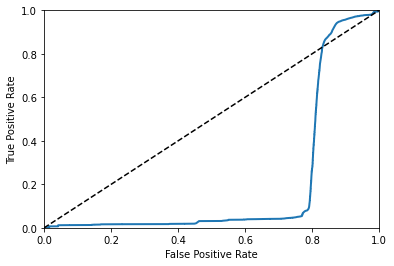

In [70]:
from sklearn.metrics import roc_curve
#Roc -> Receiver operating characterestic. Graphical plot that illustrates the performance of a binary classifier system as its discrimination
#threshold is varied. 
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
#svc = LinearSVC(C=1.0)

[0.87575017 0.8766075  0.87873496]


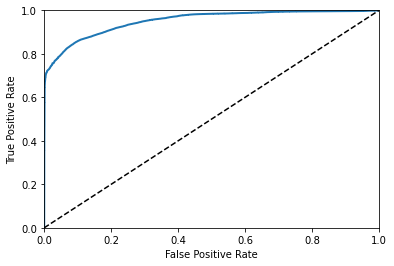

In [72]:
lr = LogisticRegression(penalty='l2')
lr=lr.fit(X_train, y_train)
y_predict =lr.predict(X_test)
print(cross_val_score(lr, X_train, y_train, cv=3, scoring="accuracy"))

y_scores = cross_val_predict(lr, X_train, y_train, cv=3, method="decision_function")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr, 'Logistic Regression' )
plt.show()

[0.99869812 0.99853936 0.9985076 ]
[[50405    29]
 [  105 43940]]
0.9993404444040119
0.9976160744692928
0.9984775149408048


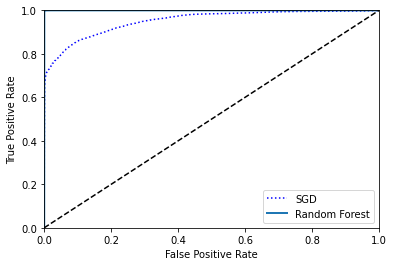

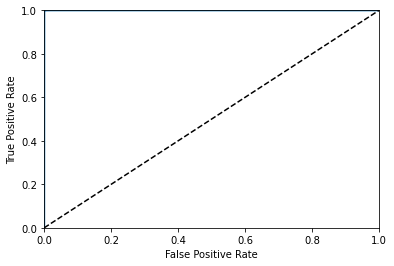

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc.predict(X_test)
print(cross_val_score(rfc, X_train, y_train, cv=3, scoring="accuracy"))
y_probas_forest = cross_val_predict(rfc, X_train, y_train, cv=3, method="predict_proba")



y_train_pred = cross_val_predict(rfc, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_train_pred))
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred)) 
print(f1_score(y_train, y_train_pred))

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

###########
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_train, y_scores_forest)

def plot_roc_curve(fpr_RF, tpr_RF, label=None):
    plt.plot(fpr_RF, tpr_RF, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr_RF, tpr_RF, "Random Forest")
plt.show()
#############

In [74]:
from sklearn.preprocessing import StandardScaler
StdSc= StandardScaler()
#Fit the scaling parameters and then transform the data
#StdSc= StdSc.fit(X_train)
#sgd_clf.fit(X_train, y_train)
#X_scaled= StdSc.transform(X_train)
X_scaled= StdSc.fit_transform(X_train)
sgd_scaled = SGDClassifier(random_state=42)
sgd_scaled.fit(X_scaled, y_train)

SGDClassifier(random_state=42)

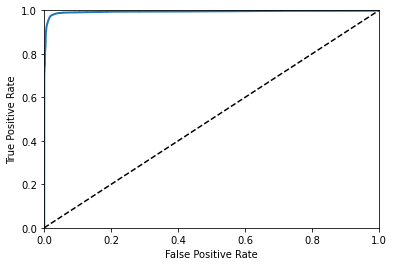

In [75]:
y_scores = cross_val_predict(sgd_scaled, X_scaled, y_train, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr, "SGD")
plt.show()


In [76]:
sgd_scaled.predict(X_scaled)

array([1., 0., 0., ..., 1., 0., 0.])

In [77]:
## from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_scaled, X_scaled, y_train, cv=3, scoring="accuracy"))

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_scaled, X_scaled, y_train, cv=3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))

from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred)) 

from sklearn.metrics import f1_score
print(f1_score(y_train, y_train_pred))
y_scores = cross_val_predict(sgd_scaled, X_scaled, y_train, cv=3, method="decision_function")

[0.97656622 0.9747563  0.97885244]
[[49586   848]
 [ 1351 42694]]
0.980524551008222
0.9693268248382336
0.9748935344286254


In [78]:
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X_train, y_train)

#svm_clf.predict(X_train)
prediction = svm_clf.predict(X_train)
svm_clf.score(X_train, y_train) 

0.9764392087130473

In [79]:
svm_clf.score(X_test, y_test) 

0.9772337588112021

[ 6.17131486 -2.50641859 -1.84089988 ...  7.67420337 -2.36369317
 -3.13310949]


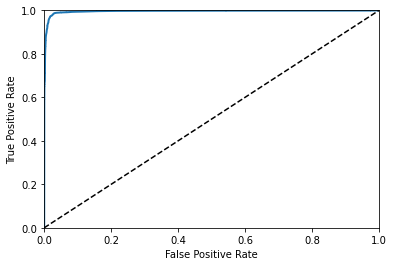

In [80]:
y_scores = cross_val_predict(svm_clf, X_train, y_train, cv=3, method="decision_function")
print(y_scores)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr, 'SVM' )
plt.show()